# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('sinasc_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
def categorizar_apgar(APGAR5):
    if APGAR5 < 3:
        return 'asfixia grave'
    elif 4 <= APGAR5 < 5:
        return 'asfixia moderada'
    elif 6 <= APGAR5 < 7:
        return 'asfixia leve'
    else: 
        return 'normal'

df['APGAR5_Categorizado'] = df['APGAR5'].apply(categorizar_apgar)

# removendo a categoria 'normal' para não sujar os dados da nossa variavel resposta 

df = df[df['APGAR5_Categorizado'] !='normal']


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

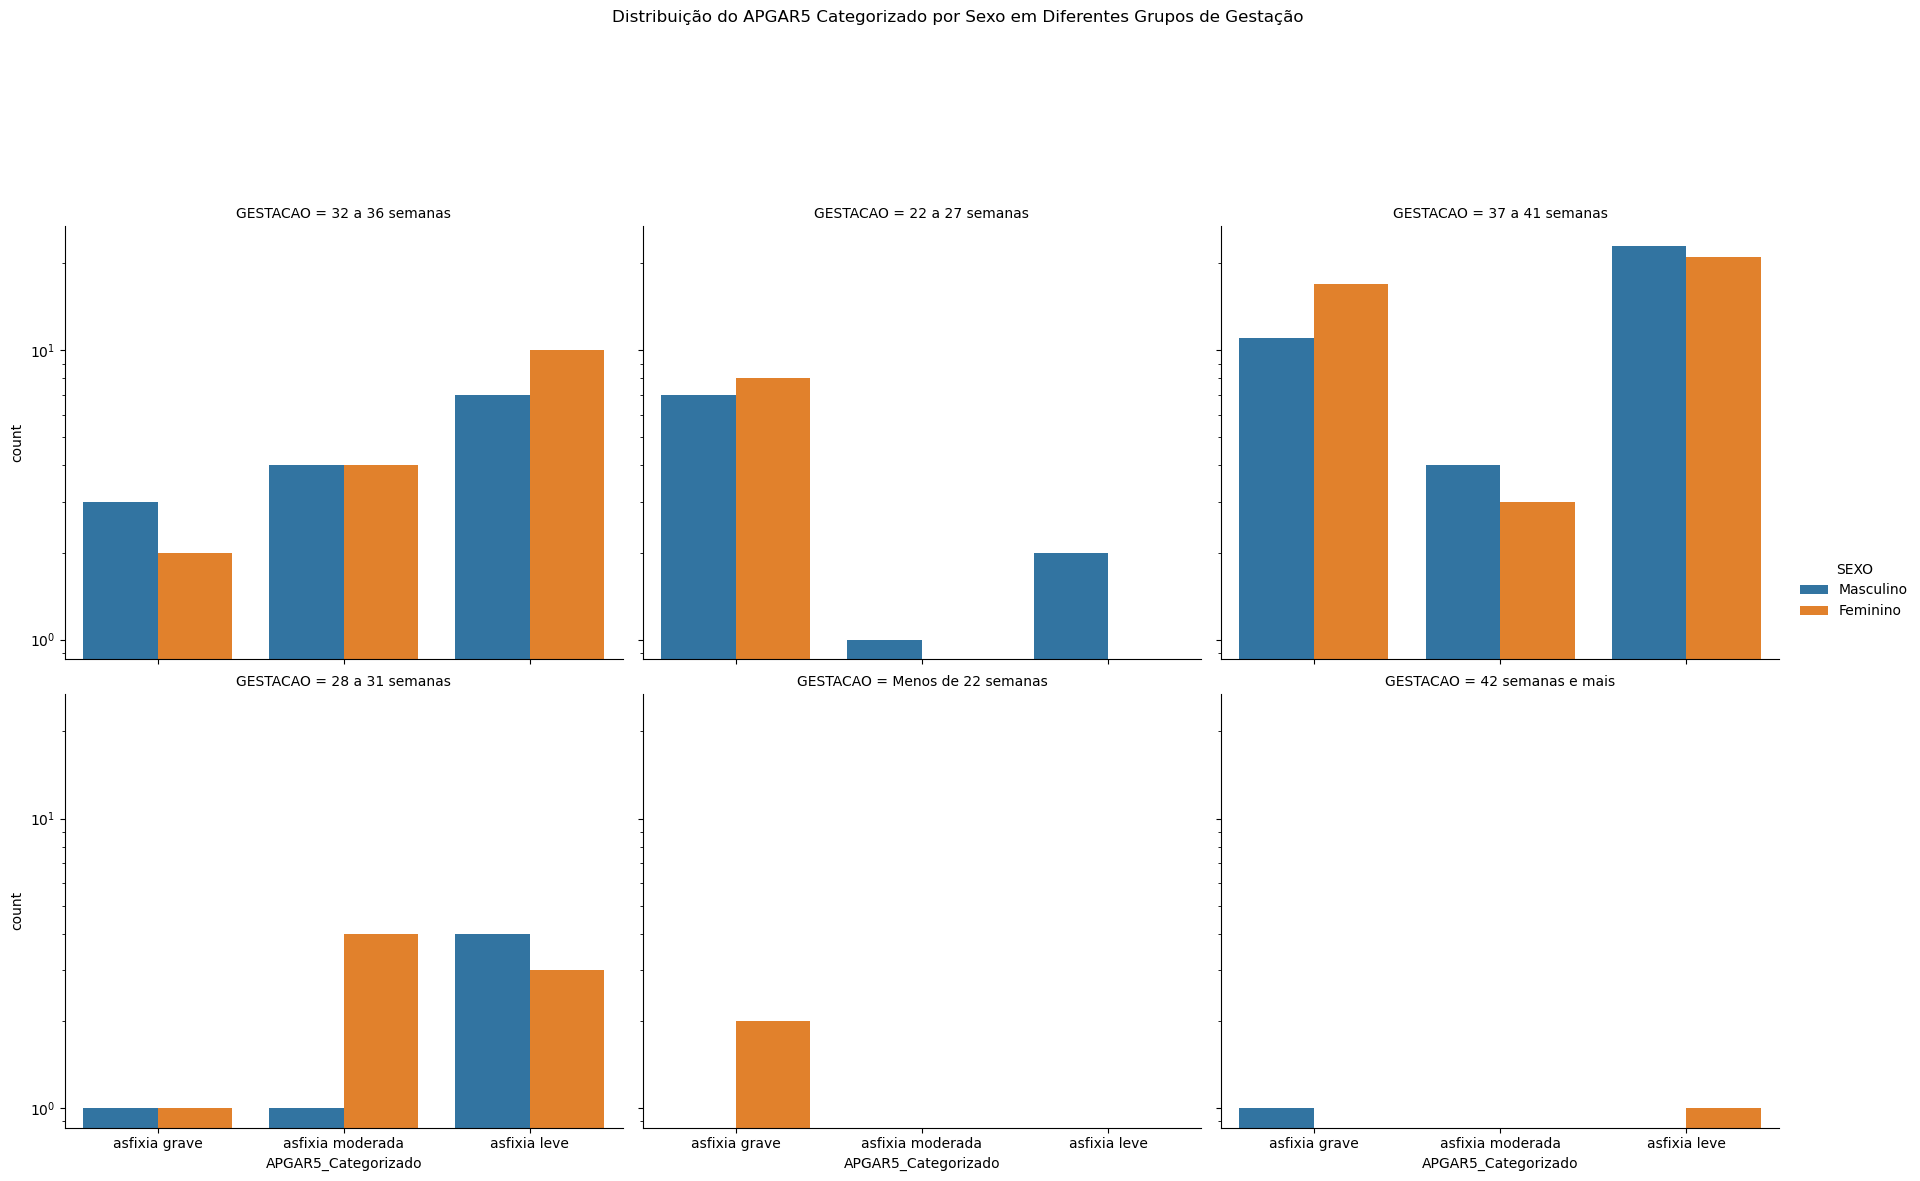

In [4]:
cross_tap = pd.crosstab(df['APGAR5_Categorizado'], df['SEXO'])
sns.catplot(data=df, kind="count", x="APGAR5_Categorizado", hue="SEXO", col="GESTACAO", 
            col_wrap=3, height=6)
plt.subplots_adjust(top=0.8)
plt.suptitle('Distribuição do APGAR5 Categorizado por Sexo em Diferentes Grupos de Gestação')

# Definindo o eixo y para uma escala logarítmica
plt.yscale('log')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
cross_tap = pd.crosstab(df['GESTACAO'], df['APGAR5_Categorizado'])
print(cross_tap)


APGAR5_Categorizado  asfixia grave  asfixia leve  asfixia moderada
GESTACAO                                                          
22 a 27 semanas                 15             2                 1
28 a 31 semanas                  2             7                 5
32 a 36 semanas                  6            17                 8
37 a 41 semanas                 28            45                 7
42 semanas e mais                1             1                 0
Menos de 22 semanas              2             0                 0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
# O APGAR tem relação com os dias de gestação?
cross_tap.sum(axis = 1)
df_pct = cross_tap.div(cross_tap.sum(axis = 1), axis = 0)
df_pct

APGAR5_Categorizado,asfixia grave,asfixia leve,asfixia moderada
GESTACAO,,,
22 a 27 semanas,0.833333,0.111111,0.055556
28 a 31 semanas,0.142857,0.500000,0.357143
32 a 36 semanas,0.193548,0.548387,0.258065
37 a 41 semanas,0.350000,0.562500,0.087500
42 semanas e mais,0.500000,0.500000,0.000000
Menos de 22 semanas,1.000000,0.000000,0.000000


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

Text(0, 0.5, 'APGAR5 em QTD')

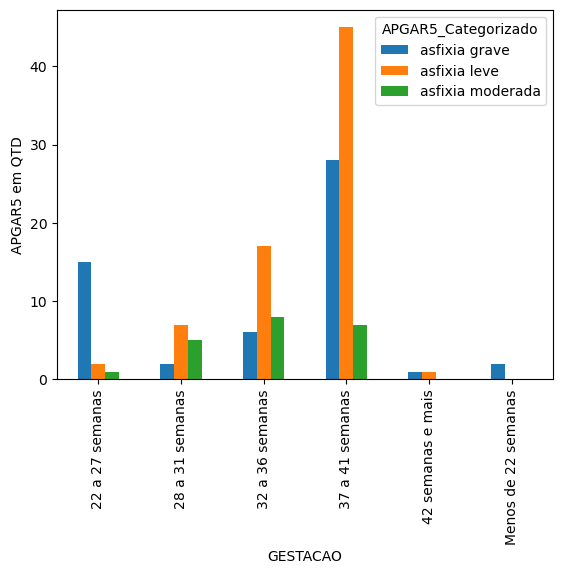

In [14]:
cross_tap.plot(kind='bar')
plt.ylabel('APGAR5 em QTD')

O grafico mostra que quanto menor a gestação mais chances  de asfixia do feto. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Text(0, 0.5, 'Peso (kg)')

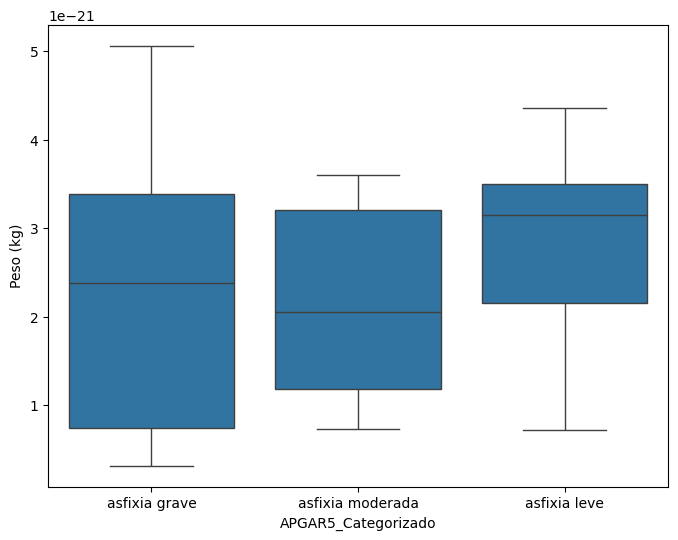

In [19]:
# altenrando o peso em KG para  facilitar a visualização
df['PESO'] = df['PESO']/1000

plt.figure(figsize=(8,6))
sns.boxplot(x='APGAR5_Categorizado',y='PESO',data=df)
plt.ylabel('Peso (kg)')



O grafico mostra que asfixia grave se concentra no primeiro quartil entreo peso em (kg) 1 e 2 q